<a href="https://colab.research.google.com/github/NgdHung31/Real_Estate_Regession_Deep_Learning/blob/main/Kaggle_KerassRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hose Sales Prediction (Keras-Regression vs Multiple Regression)

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


Data used: https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
%pip install gdown -U -q
%pip install scikit-learn -U -q
# %pip install tensorflow -U -q
!gdown --id 1H98Xv24pGw9jTQO5sJsp6X8xRPfrxiHG --output "./content/dataset_non_outliers_Price_Area.csv"

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
/home/dev_ai/miniconda/envs/lightning/lib/python3.8/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1H98Xv24pGw9jTQO5sJsp6X8xRPfrxiHG
To: /media/dev_ai/Artist_Cache/Real_Estate_Regession_Deep_Learning/content/dataset_non_outliers_Price_Area.csv
100%|██████████████████████████████████████| 9.23M/9.23M [00:00<00:00, 12.8MB/s]


In [2]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

In [3]:
# read the csv file
Data = pd.read_csv(
    './content/dataset_non_outliers_Price_Area.csv', low_memory=False)

# Exploratory Data Analysis

In [4]:
Data.head(5)

,Property_type,Area,Width,Length,Frontage,Number_of_floors,Number_of_bedrooms,Number_of_toilets,Legal_status,Furniture,...,Posting_date,Expiry_date,Type_of_listing,Project_name,Street,Ward,District,Province,Distance,Price
0,Nhà biệt thự,80.0,NaN,NaN,NaN,3.0,4.0,3,Đã có sổ,Có nội thất,...,1/11/2023,16/11/2023,Tin thường,Dự án Lovera Park,Đường Trịnh Quang Nghị,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,9.623252,6.5
1,Nhà biệt thự,80.0,NaN,NaN,6.0,3.0,3.0,3,Đã có sổ,Có nội thất,...,31/10/2023,7/11/2023,Tin VIP Bạc,Dự án Khang Điền Bình Chánh,Đường Trịnh Quang Nghị,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,9.623252,7.9
2,Nhà biệt thự,136.5,NaN,NaN,7.0,3.0,4.0,4,Đã có sổ,Có nội thất,...,30/10/2023,14/11/2023,Tin VIP Bạc,Dự án KDC Phong Phú 5,Đường Số 5,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,9.623252,10.8
3,Nhà biệt thự,95.0,NaN,NaN,NaN,5.0,5.0,4,Đã có sổ,Không có nội thất,...,20/10/2023,4/11/2023,Tin thường,Unknown,Đường Quách Điêu,Xã Vĩnh Lộc A,Bình Chánh,TP Hồ Chí Minh,14.245030,7.6
4,Nhà biệt thự,90.0,NaN,NaN,NaN,5.0,5.0,4,Đã có sổ,Không có nội thất,...,30/10/2023,14/11/2023,Tin thường,Unknown,Đường Quách Điêu,Xã Vĩnh Lộc A,Bình Chánh,TP Hồ Chí Minh,14.245030,7.6


In [5]:
#get some information about our DataSet
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47637 entries, 0 to 47636
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property_type        47637 non-null  object 
 1   Area                 47637 non-null  float64
 2   Width                3205 non-null   float64
 3   Length               1648 non-null   float64
 4   Frontage             8695 non-null   float64
 5   Number_of_floors     20686 non-null  float64
 6   Number_of_bedrooms   41687 non-null  float64
 7   Number_of_toilets    36947 non-null  object 
 8   Legal_status         47637 non-null  object 
 9   Furniture            47637 non-null  object 
 10  House_orientation    11611 non-null  object 
 11  Balcony_orientation  6539 non-null   object 
 12  Access_road          8451 non-null   float64
 13  Posting_date         47637 non-null  object 
 14  Expiry_date          26859 non-null  object 
 15  Type_of_listing      26898 non-null 

,count,mean,std,min,25%,50%,75%,max
Area,47637.0,74.756512,28.897334,7.000000,55.000000,70.000000,90.000000,161.000000
Width,3205.0,4.931357,7.158506,2.000000,4.000000,4.000000,5.000000,350.000000
Length,1648.0,15.070631,9.356820,1.000000,11.000000,14.000000,18.000000,222.500000
Frontage,8695.0,5.570094,12.226474,1.000000,4.000000,4.800000,6.000000,980.000000
Number_of_floors,20686.0,3.145702,1.314078,1.000000,2.000000,3.000000,4.000000,9.000000
Number_of_bedrooms,41687.0,3.038117,2.118783,1.000000,2.000000,2.000000,4.000000,57.000000
Access_road,8451.0,10.108733,9.184272,1.050000,5.000000,8.000000,12.000000,322.000000
Distance,47637.0,7.362353,3.917916,0.449674,4.274879,6.949138,9.636417,49.613941
Price,47637.0,7.174582,6.590799,0.010000,2.600000,4.700000,9.000000,33.000000


In [6]:
#let's drop unnecessory featurs
#Data = Data.drop('id',axis=1)
#Data = Data.drop('zipcode',axis=1)

In [7]:
# check if there are any Null values
Data.isnull().sum()

Property_type              0
Area                       0
Width                  44432
Length                 45989
Frontage               38942
Number_of_floors       26951
Number_of_bedrooms      5950
Number_of_toilets      10690
Legal_status               0
Furniture                  0
House_orientation      36026
Balcony_orientation    41098
Access_road            39186
Posting_date               0
Expiry_date            20778
Type_of_listing        20739
Project_name           25214
Street                  1461
Ward                       0
District                   0
Province                   0
Distance                   0
Price                      0
dtype: int64

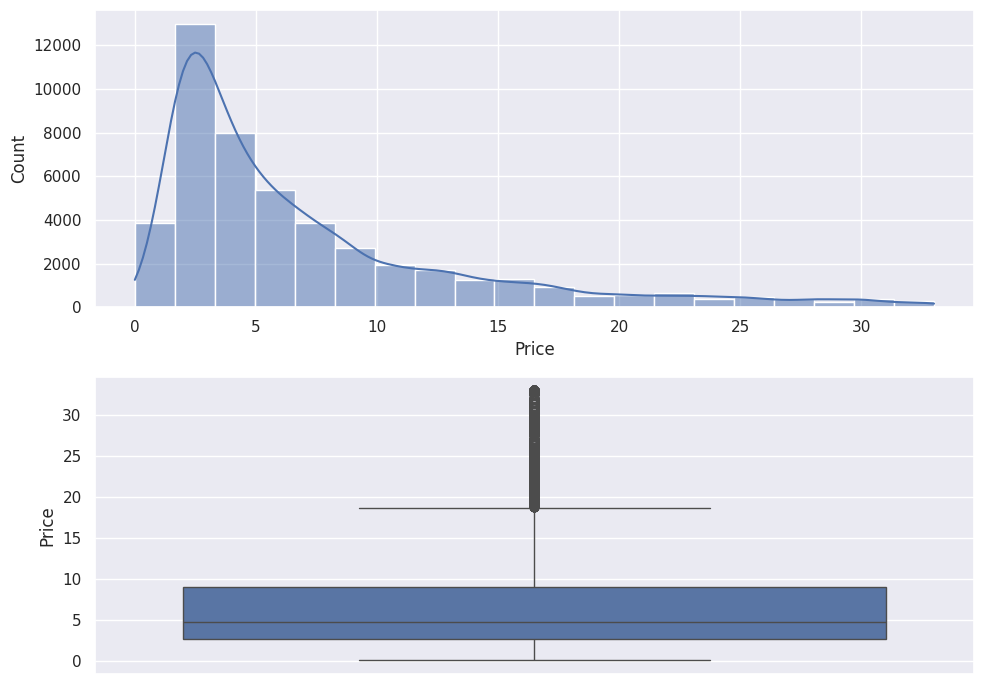

In [8]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(Data['Price'], kde=True, bins=20)
fig.add_subplot(2,1,2)
sns.boxplot(Data['Price'])
plt.tight_layout()

## Feature Engineer

In [9]:
Data = Data.drop(labels=['Frontage','Street', 'Ward', 'Province', 'Width', 'Length', 'House_orientation', 'Balcony_orientation', 'Access_road', 'Posting_date', 'Expiry_date', 'Type_of_listing'], axis=1)

Data.loc[Data["Property_type"] == "Chung cư", "Number_of_floors"] = 1
Data.loc[pd.isnull(Data["Project_name"]), "Project_name"] = "Other"

Data.isnull().sum()

Property_type             0
Area                      0
Number_of_floors       7146
Number_of_bedrooms     5950
Number_of_toilets     10690
Legal_status              0
Furniture                 0
Project_name              0
District                  0
Distance                  0
Price                     0
dtype: int64

In [10]:
Data = Data.rename(columns={'Number_of_floors': 'Floors',
                   'Number_of_bedrooms': 'Bedrooms', 
                   'Number_of_toilets': 'Toilets'})

# Convert object value to numeric value
Data['Toilets'] = Data['Toilets'].replace('Nhiều hơn 6 phòng', 7)
Data['Toilets'] = pd.to_numeric(Data['Toilets'], errors='coerce')

/tmp/ipykernel_803484/2360245049.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


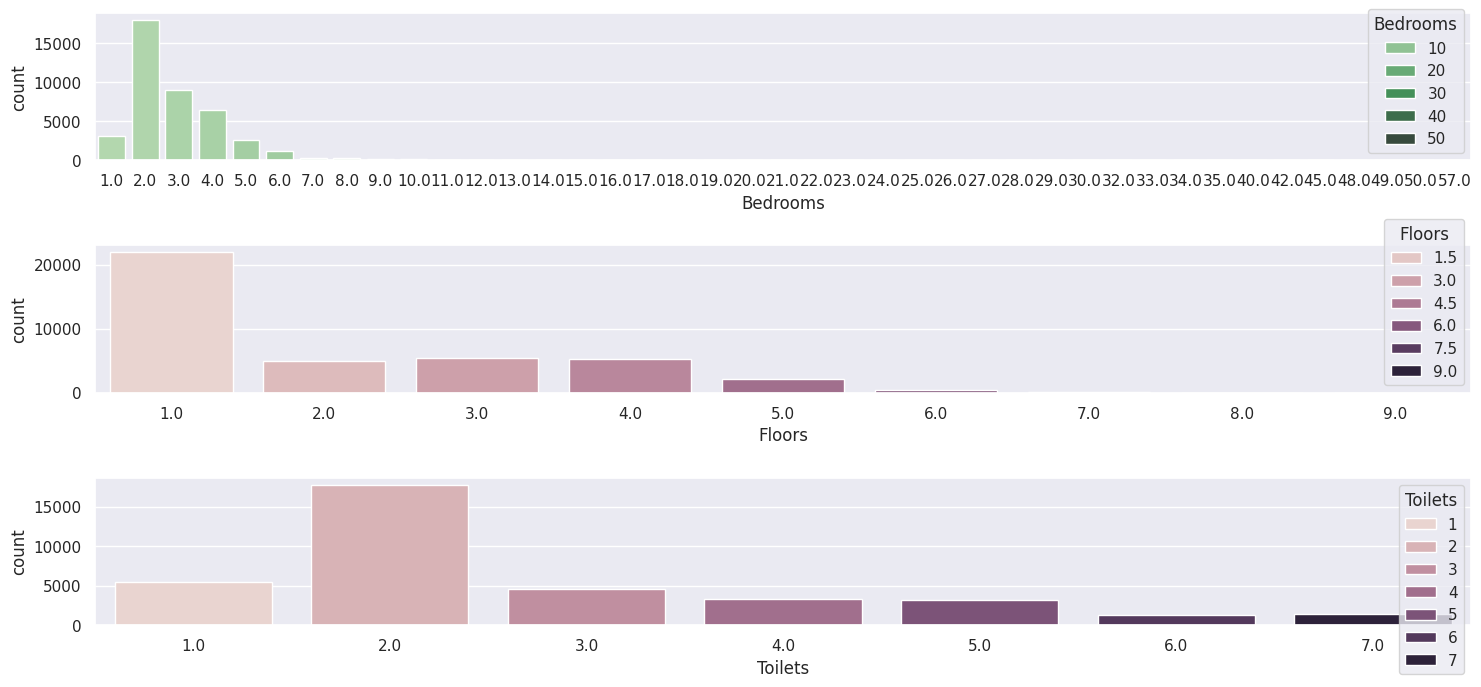

In [11]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(3,1,1)
sns.countplot(x='Bedrooms', hue='Bedrooms', data=Data,
              palette='Greens_d', legend=True)
fig.add_subplot(3,1,2)
sns.countplot(x='Floors', hue='Floors', data=Data)
fig.add_subplot(3,1,3)
sns.countplot(x='Toilets', hue='Toilets', data=Data)
plt.tight_layout()

# Encoding the values

In [12]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47637 entries, 0 to 47636
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_type  47637 non-null  object 
 1   Area           47637 non-null  float64
 2   Floors         40491 non-null  float64
 3   Bedrooms       41687 non-null  float64
 4   Toilets        36947 non-null  float64
 5   Legal_status   47637 non-null  object 
 6   Furniture      47637 non-null  object 
 7   Project_name   47637 non-null  object 
 8   District       47637 non-null  object 
 9   Distance       47637 non-null  float64
 10  Price          47637 non-null  float64
dtypes: float64(6), object(5)
memory usage: 4.0+ MB


,count,mean,std,min,25%,50%,75%,max
Area,47637.0,74.756512,28.897334,7.000000,55.000000,70.000000,90.000000,161.000000
Floors,40491.0,2.096194,1.425713,1.000000,1.000000,1.000000,3.000000,9.000000
Bedrooms,41687.0,3.038117,2.118783,1.000000,2.000000,2.000000,4.000000,57.000000
Toilets,36947.0,2.739627,1.534666,1.000000,2.000000,2.000000,3.000000,7.000000
Distance,47637.0,7.362353,3.917916,0.449674,4.274879,6.949138,9.636417,49.613941
Price,47637.0,7.174582,6.590799,0.010000,2.600000,4.700000,9.000000,33.000000


In [13]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of OrdinalEncoder
Encoder = OrdinalEncoder()
Encoder.set_params(encoded_missing_value=-1)

Categorical_columns = ['Property_type', 'Legal_status', 'Furniture', 'Project_name', 'District']

# Fit the encoder to your data
Encoder.fit(Data[Categorical_columns])

# Transform your data using the encoder
Data[Categorical_columns] = Encoder.transform(Data[Categorical_columns])

# Print the encoded data
Data.head(5)

,Property_type,Area,Floors,Bedrooms,Toilets,Legal_status,Furniture,Project_name,District,Distance,Price
0,1.0,80.0,3.0,4.0,3.0,3.0,1.0,449.0,0.0,9.623252,6.5
1,1.0,80.0,3.0,3.0,3.0,3.0,1.0,411.0,0.0,9.623252,7.9
2,1.0,136.5,3.0,4.0,4.0,3.0,1.0,403.0,0.0,9.623252,10.8
3,1.0,95.0,5.0,5.0,4.0,3.0,2.0,1129.0,0.0,14.245030,7.6
4,1.0,90.0,5.0,5.0,4.0,3.0,2.0,1129.0,0.0,14.245030,7.6


In [14]:
## Sử dụng model Machine Learning để dự đoán giá trị bị thiếu
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cols = ['Property_type', 'Area', 'Floors', 'Bedrooms', 'Toilets']
impute_it = IterativeImputer()
Data[cols] = impute_it.fit_transform(Data[cols])

Data.isnull().sum()

Property_type    0
Area             0
Floors           0
Bedrooms         0
Toilets          0
Legal_status     0
Furniture        0
Project_name     0
District         0
Distance         0
Price            0
dtype: int64

# Scaling and Train Test Split


In [15]:
X = Data.drop('Price',axis = 1).values
y = Data['Price'].values

#splitting Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (38109, 10)
Test size:  (9528, 10)


# Feature Scalling

In [16]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

# Method1: Multiple Linear Regression

In [17]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([ 0.39017199,  2.94284595,  2.87690581,  0.15946897,  0.2457853 ,
       -0.16713906,  0.24452226, -0.16938496,  0.08728976, -1.68771816])

In [18]:
#coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient'])
#coeff_df

In [19]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,32.50,21.105638
1,4.90,6.217912
2,5.35,4.554768
3,11.70,11.396764
4,10.50,10.203102
5,0.60,0.787892
6,19.00,14.128537
7,4.70,6.090871
8,7.80,11.121281
9,7.30,3.821514


In [20]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

NameError: name 'y_pred' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd)))
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

In [ ]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['price'].mean()

In [ ]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

# Method2: Keras Regression

In [ ]:
# having 19 nueron is based on the number of available featurs

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the Model

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

In [ ]:
model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))


# Evaluation on Test Data

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

In [ ]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['price'].mean()

In [ ]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

# Hoe we can use the model!

In [ ]:
# let's drop price and keep first line featurs, then put those featur inside the model and estimae the price!
single_house = Data.drop('price',axis = 1).iloc[0]

In [ ]:
# need to apply featur scalling on those featurs
single_house = s_scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
# apply model on those featurs
model.predict(single_house)

In [ ]:
# compare the prediction with real price for the first column
Data['price'][0]

# Multiple Linear Regression vs Keras Regression

In [ ]:

print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd)))
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

### Lightning

In [ ]:
%pip install lightning -U -q

In [41]:
from pathlib import Path
import torch
import lightning as L
import pandas as pd
#from sklearn import preprocessing
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
import torch as th
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict
from sklearn import metrics

class LitDataModule(L.LightningDataModule):
    def __init__(self, batch_size, num_workers, data):
        super(LitDataModule, self).__init__()
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.data = data
        X = data.drop('Price', axis=1).values
        y = data['Price'].values

    def setup(self, stage=None):
        x = self.data.drop('Price', axis=1).values
        y = self.data['Price'].values
        
        s_scaler = StandardScaler()
        x = s_scaler.fit_transform(x.astype(np.float64))
        
        dataset = TensorDataset(
            torch.tensor(x, dtype=torch.float), torch.tensor(y, dtype=torch.float))
        
        train_size = int(0.8 * len(dataset))
        test_size = int(0.1 * len(dataset))
        val_size = int(len(dataset) - train_size - test_size)
        print('Train size: ', train_size)
        print('Test size: ', test_size)
        print('Validation size: ', val_size)
        self.train_dataset, self.valid_dataset, self.test_dataset = random_split(dataset, [train_size, val_size, test_size])

    def train_dataloader(self):
        dataloader = DataLoader(self.train_dataset,
                                batch_size=self.batch_size,
                                shuffle=True,
                                num_workers=self.num_workers,
                                pin_memory=True,
                                drop_last=True)
        return dataloader

    def val_dataloader(self):
        dataloader = DataLoader(self.valid_dataset,
                                batch_size=self.batch_size,
                                num_workers=self.num_workers,
                                pin_memory=True,
                                drop_last=True)
        return dataloader
    
    def test_dataloader(self):
        dataloader = DataLoader(self.test_dataset,
                                batch_size=self.batch_size,
                                num_workers=self.num_workers,
                                pin_memory=True,
                                drop_last=False)
        return dataloader

In [42]:
class LitDNNModule(L.LightningModule):
    def __init__(self, learning_rate = 0.002, batch = 128):
        super(LitDNNModule, self).__init__()
        self.learning_rate = learning_rate
        self.batch = batch
        self.validation_step_outputs = []
        self.loss_fn = nn.MSELoss()
        self.layers = nn.Sequential(OrderedDict(self.get_fclayer_list([10, 512, 256, 128, 64, 32, 16, 8])))

    # creates a list of hidden layers with given number of neuron in each layer and connects it to the output layer.
    # Relu is used as the activation funtion. No activation function is applied for the last layer output
    def get_fclayer_list(self, hidden_layers, outputs=1):
        input_layers, output_layers = hidden_layers[:-1], hidden_layers[1:]
        layers = []
        for i, (l1, l2) in enumerate(zip(input_layers, output_layers)):
            layers.append((f'fc{i}', nn.Linear(l1, l2)))
            layers.append((f'leakyrelu{i}', nn.LeakyReLU()))
        layers.append(('fc_out', nn.Linear(output_layers[-1], outputs)))
        return layers
    def forward(self, x):
        x = self.layers(x)
        return x

    # def configure_optimizers(self):
    #    return optim.AdamW(self.parameters(), lr=self.learning_rate)

    def configure_optimizers(self):
        optimizer = optim.Adadelta(self.parameters(), lr=self.learning_rate)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.1, patience=5, min_lr=1e-8, verbose=True)
        return {"optimizer": optimizer, "lr_scheduler": scheduler, "monitor": "avg_val_loss"}

    def shared_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self.forward(x)
        y = y.view(y.size(0), -1)
        loss = self.loss_fn(y_pred, y)
        return loss, y_pred

    def training_step(self, batch, batch_idx):
        loss, y_pred = self.shared_step(batch, batch_idx)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, y_pred = self.shared_step(batch, batch_idx)
        self.log("val_loss", loss)
        self.validation_step_outputs.append(y_pred)
        return {"val_loss", loss}

    def on_validation_epoch_end(self):
        avg_val_loss = torch.stack(self.validation_step_outputs).mean()
        self.log('avg_val_loss', avg_val_loss)
        self.validation_step_outputs.clear()

    def test_step(self, batch, batch_idx):
        x, y = batch
        y = y.to('cpu')
        y = y.view(y.size(0), -1)
        loss, y_pred = self.shared_step(batch, batch_idx)
        y_pred = y_pred.to('cpu')
        VarScore = metrics.explained_variance_score(y, y_pred)
        self.log('Varian Score: ', VarScore)
        return y_pred, VarScore

In [43]:
from argparse import Namespace
import torch
from lightning import seed_everything
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

# Define hparams
hparams = Namespace(
    checkpoint_name='./checkpoint/final.ckpt',
    data_folder='./content',
    test_input='test.csv',
    test_output='test_pred.csv',
    default_root_dir='./logs',
    max_epochs=450,
    gpus=(-1 if torch.cuda.is_available() else 0),
    auto_select_gpus=True,
    deterministic=True,
    batch_size=128,
    num_workers=6,
    learning_rate=0.02,
    fast_dev_run=False
)

early_stop_callback = EarlyStopping(monitor='val_loss', min_delta=1e-7 , patience=80, verbose=True, mode='min')
seed_everything(77)

ml_module = LitDNNModule(learning_rate=0.01, batch=64)
data_module = LitDataModule(batch_size=64, num_workers=6, data=Data)
data_module.setup()
model_trainer = L.Trainer(
    accelerator="gpu", default_root_dir='./logs', callbacks=[early_stop_callback], max_epochs=1000)
model_trainer.logger = L.pytorch.loggers.TensorBoardLogger('logs/', name='exp')


def train_model(hparams):
    #model_trainer = pl.Trainer.from_argparse_args(hparams)

    model_trainer.fit(ml_module, datamodule=data_module)
    model_trainer.save_checkpoint(hparams.checkpoint_name)


def test_model(hparams):
    model = LitDNNModule.load_from_checkpoint(hparams.checkpoint_name)
    model_trainer.test(model, datamodule=data_module)

# Call train_model() with hparams
train_model(hparams=hparams)
#test_model(hparams=hparams)

Seed set to 77
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/dev_ai/miniconda/envs/lightning/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:28: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.

  | Name    | Type       | Params
---------------------------------------
0 | loss_fn | MSELoss    | 0     
1 | layers  | Sequential | 180 K 
---------------------------------------
180 K     Trainable params
0         Non-trainable params
180 K     Total params
0.723     Total estimated model params size (MB)


Train size:  38109
Test size:  4763
Validation size:  4765
Train size:  38109
Test size:  4763
Validation size:  4765
Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

In [ ]:
data_module = LitDataModule(batch_size=64, num_workers=6, data=Data)
model_trainer = L.Trainer(
    accelerator="gpu", default_root_dir='./logs', callbacks=[early_stop_callback], max_epochs=1000)
model_trainer.logger = L.pytorch.loggers.TensorBoardLogger('logs/', name='exp')

model = LitDNNModule.load_from_checkpoint(hparams.checkpoint_name)
a = model_trainer.test(model, datamodule=data_module)
print(a)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Train size:  38109
Test size:  4763
Validation size:  4765
Testing DataLoader 0: 100%|██████████| 75/75 [00:00<00:00, 329.76it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Varian Score:          0.8315617442131042
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'Varian Score: ': 0.8315617442131042}]
